In [1]:
# Bright spot detection

In [2]:
# install the necessary packages
%pip install imutils scikit-image opencv-python

/bin/bash: /home/therandomtroll/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt

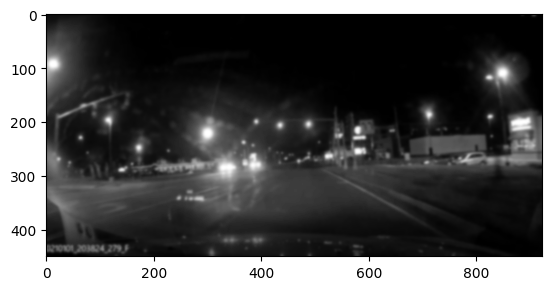

In [4]:
# read the image, convert it to grayscale and blur it
image = cv2.imread("test_image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blurred, cmap='gray')

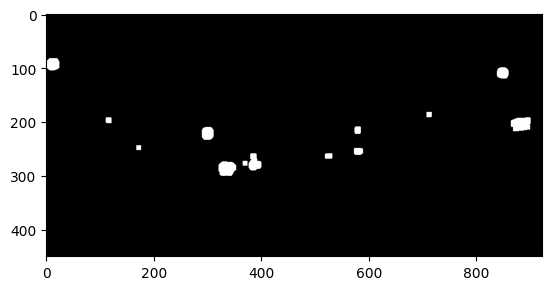

In [5]:
# threshold the image to reveal light regions in the
# blurred image
thresholded_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresholded_image = cv2.erode(thresholded_image, None, iterations=2)
thresholded_image = cv2.dilate(thresholded_image, None, iterations=4)
plt.imshow(thresholded_image, cmap='gray')

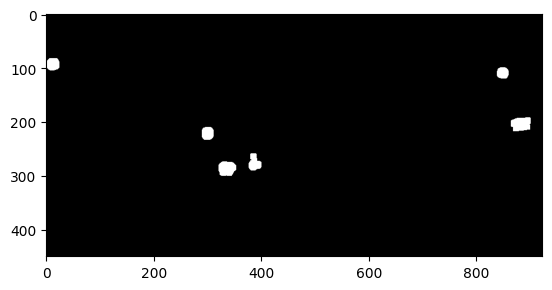

In [6]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresholded_image)
mask = np.zeros(thresholded_image.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresholded_image.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)

plt.imshow(mask, cmap='gray')

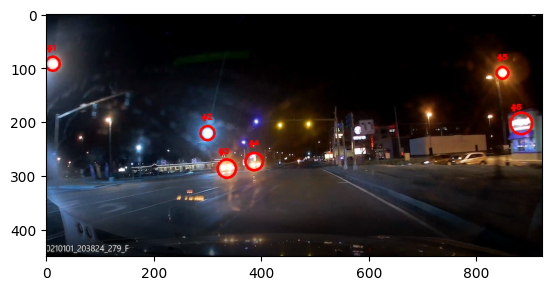

In [7]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(cX), int(cY)), int(radius),
		(255, 0, 0), 3)
	cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 0), 2)
    
plt.imshow(image, cmap='gray')